###### Problem  Statement
Global Mart is an online supergiant store that has worldwide operations. This store takes orders and delivers across the globe and deals with all the major product categories — consumer, corporate & home office.

As a sales manager for this store, you have to forecast the sales and quantity of the products for the next 6 months, so that you have an estimate of the demand and the sales of the products in those months and can plan your inventory and business processes accordingly.

In [940]:
##Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [941]:
#Read the data file
data=pd.read_csv("Global2.csv")
data.head()
data.shape

(51290, 6)

In [942]:
data.head()

,Order Date,Segment,Market,Sales,Quantity,Profit
0,31-07-2012,Consumer,US,2309.650,7,762.1845
1,05-02-2013,Corporate,APAC,3709.395,9,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,9,919.9710
3,28-01-2013,Home Office,EU,2892.510,5,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,8,311.5200


In [943]:
data["Parsed_Date"] = pd.to_datetime(data["Order Date"],format="%d-%m-%Y") #Create Parsed_Date column with format as specified in Date time frmat

In [944]:
data.head(10)

,Order Date,Segment,Market,Sales,Quantity,Profit,Parsed_Date
0,31-07-2012,Consumer,US,2309.650,7,762.1845,2012-07-31
1,05-02-2013,Corporate,APAC,3709.395,9,-288.7650,2013-02-05
2,17-10-2013,Consumer,APAC,5175.171,9,919.9710,2013-10-17
3,28-01-2013,Home Office,EU,2892.510,5,-96.5400,2013-01-28
4,05-11-2013,Consumer,Africa,2832.960,8,311.5200,2013-11-05
5,28-06-2013,Corporate,APAC,2862.675,5,763.2750,2013-06-28
6,07-11-2011,Consumer,APAC,1822.080,4,564.8400,2011-11-07
7,14-04-2012,Consumer,APAC,5244.840,6,996.4800,2012-04-14
8,14-10-2014,Corporate,US,5083.960,5,1906.4850,2014-10-14
9,28-01-2012,Consumer,US,4297.644,13,-1862.3124,2012-01-28


In [945]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 7 columns):
Order Date     51290 non-null object
Segment        51290 non-null object
Market         51290 non-null object
Sales          51290 non-null float64
Quantity       51290 non-null int64
Profit         51290 non-null float64
Parsed_Date    51290 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 2.7+ MB


In [946]:
data['Parsed_Date']=data['Parsed_Date'].dt.strftime('%Y-%m') #Convert the Parsed_Date format to yyyy-mm

In [947]:
data.head(10)

,Order Date,Segment,Market,Sales,Quantity,Profit,Parsed_Date
0,31-07-2012,Consumer,US,2309.650,7,762.1845,2012-07
1,05-02-2013,Corporate,APAC,3709.395,9,-288.7650,2013-02
2,17-10-2013,Consumer,APAC,5175.171,9,919.9710,2013-10
3,28-01-2013,Home Office,EU,2892.510,5,-96.5400,2013-01
4,05-11-2013,Consumer,Africa,2832.960,8,311.5200,2013-11
5,28-06-2013,Corporate,APAC,2862.675,5,763.2750,2013-06
6,07-11-2011,Consumer,APAC,1822.080,4,564.8400,2011-11
7,14-04-2012,Consumer,APAC,5244.840,6,996.4800,2012-04
8,14-10-2014,Corporate,US,5083.960,5,1906.4850,2014-10
9,28-01-2012,Consumer,US,4297.644,13,-1862.3124,2012-01


In [948]:
data['Parsed_Date']=pd.to_datetime(data['Parsed_Date'], format = '%Y-%m') #Convert the Parsed_date column back to Datetime dtype

In [949]:
data.head()

,Order Date,Segment,Market,Sales,Quantity,Profit,Parsed_Date
0,31-07-2012,Consumer,US,2309.650,7,762.1845,2012-07-01
1,05-02-2013,Corporate,APAC,3709.395,9,-288.7650,2013-02-01
2,17-10-2013,Consumer,APAC,5175.171,9,919.9710,2013-10-01
3,28-01-2013,Home Office,EU,2892.510,5,-96.5400,2013-01-01
4,05-11-2013,Consumer,Africa,2832.960,8,311.5200,2013-11-01


In [950]:
data['Segment_Market']=data['Segment']+'_'+data['Market'] #Combining Segment+Market to a single column

In [951]:
data.head()

,Order Date,Segment,Market,Sales,Quantity,Profit,Parsed_Date,Segment_Market
0,31-07-2012,Consumer,US,2309.650,7,762.1845,2012-07-01,Consumer_US
1,05-02-2013,Corporate,APAC,3709.395,9,-288.7650,2013-02-01,Corporate_APAC
2,17-10-2013,Consumer,APAC,5175.171,9,919.9710,2013-10-01,Consumer_APAC
3,28-01-2013,Home Office,EU,2892.510,5,-96.5400,2013-01-01,Home Office_EU
4,05-11-2013,Consumer,Africa,2832.960,8,311.5200,2013-11-01,Consumer_Africa


In [952]:
#data=data.set_index('Parsed_Date')

In [953]:
#data.head()

In [954]:
data.drop(['Order Date','Segment','Market'],axis=1,inplace=True) #Drop columns
 

In [955]:
data.head(20)


,Sales,Quantity,Profit,Parsed_Date,Segment_Market
0,2309.650,7,762.1845,2012-07-01,Consumer_US
1,3709.395,9,-288.7650,2013-02-01,Corporate_APAC
2,5175.171,9,919.9710,2013-10-01,Consumer_APAC
3,2892.510,5,-96.5400,2013-01-01,Home Office_EU
4,2832.960,8,311.5200,2013-11-01,Consumer_Africa
5,2862.675,5,763.2750,2013-06-01,Corporate_APAC
6,1822.080,4,564.8400,2011-11-01,Consumer_APAC
7,5244.840,6,996.4800,2012-04-01,Consumer_APAC
8,5083.960,5,1906.4850,2014-10-01,Corporate_US
9,4297.644,13,-1862.3124,2012-01-01,Consumer_US


In [956]:
data2=data.groupby(['Parsed_Date','Segment_Market']).agg({'Profit':['sum']}) #Group the data by Parsed_date and thenby Segment_Market and calculate the sum of profit
#data2=data.groupby(['Segment_Market']).agg({'Profit':['mean','std']})

In [957]:
#data2.columns=['Mean_Profit','Std_Profit']
#data2=data2.reset_index()

In [958]:
data2.columns=['Monthly_Sum_Profit'] #Rename column
data2=data2.reset_index()

In [959]:
print(data2)

    Parsed_Date      Segment_Market  Monthly_Sum_Profit
0    2011-01-01       Consumer_APAC           991.28250
1    2011-01-01     Consumer_Africa           475.68300
2    2011-01-01     Consumer_Canada             3.12000
3    2011-01-01       Consumer_EMEA         -2099.36400
4    2011-01-01         Consumer_EU          -845.82900
..          ...                 ...                 ...
960  2014-12-01  Home Office_Canada            32.40000
961  2014-12-01    Home Office_EMEA          -129.94500
962  2014-12-01      Home Office_EU          3650.64750
963  2014-12-01   Home Office_LATAM          1578.06872
964  2014-12-01      Home Office_US          3965.62650

[965 rows x 3 columns]


In [960]:
data2.tail(126) #We need to split the data 

,Parsed_Date,Segment_Market,Monthly_Sum_Profit
839,2014-06-01,Home Office_US,2442.71350
840,2014-07-01,Consumer_APAC,2732.48280
841,2014-07-01,Consumer_Africa,737.89800
842,2014-07-01,Consumer_Canada,14.76000
843,2014-07-01,Consumer_EMEA,-144.95100
...,...,...,...
960,2014-12-01,Home Office_Canada,32.40000
961,2014-12-01,Home Office_EMEA,-129.94500
962,2014-12-01,Home Office_EU,3650.64750
963,2014-12-01,Home Office_LATAM,1578.06872


In [961]:
#Split the data into Train-Test 
train_len=839
train_set=data2[0:train_len]
test_set=data2[train_len:]

In [962]:
train_set.head()

,Parsed_Date,Segment_Market,Monthly_Sum_Profit
0,2011-01-01,Consumer_APAC,991.2825
1,2011-01-01,Consumer_Africa,475.6830
2,2011-01-01,Consumer_Canada,3.1200
3,2011-01-01,Consumer_EMEA,-2099.3640
4,2011-01-01,Consumer_EU,-845.8290


In [963]:
#print(train_set[train_set['Segment_Market']=='Consumer_APAC'].count())

In [964]:
data3=train_set.groupby('Segment_Market').agg({'Monthly_Sum_Profit':['mean','std']})#Calculate the mean and std of each Segment_Market

In [965]:
data3.columns=['Mean_Profit','Std_Profit']
data3=data3.reset_index()

In [966]:
print(data3)

        Segment_Market  Mean_Profit   Std_Profit
0        Consumer_APAC  4223.553586  2549.477997
1      Consumer_Africa   798.898929  1155.735900
2      Consumer_Canada   230.067500   344.418377
3        Consumer_EMEA   415.354786  1142.195257
4          Consumer_EU  3627.517036  2377.233468
5       Consumer_LATAM  2252.677529  1551.949398
6          Consumer_US  2603.736252  2886.427650
7       Corporate_APAC  2556.998957  1894.221175
8     Corporate_Africa   426.027286   717.859321
9     Corporate_Canada   110.377500   134.571077
10      Corporate_EMEA   172.274500  1182.116548
11        Corporate_EU  2251.993036  1571.220713
12     Corporate_LATAM  1075.994223   958.635571
13        Corporate_US  1853.568607  1927.082015
14    Home Office_APAC  1379.120743  1463.978445
15  Home Office_Africa   333.002143   670.661897
16  Home Office_Canada   138.247500   310.386097
17    Home Office_EMEA   123.249214   756.777567
18      Home Office_EU  1097.441500  1238.125098
19   Home Office_LAT

In [967]:
data3['cov']=data3['Std_Profit']/data3['Mean_Profit']#Calculate Coefficient of variation of each segment_market

In [968]:
data3.sort_values(["cov"],axis=0,ascending=True)
#We are selecting Consumer_APAC as it has lowest CoV=Less fluctuations

,Segment_Market,Mean_Profit,Std_Profit,cov
0,Consumer_APAC,4223.553586,2549.477997,0.603633
4,Consumer_EU,3627.517036,2377.233468,0.655334
5,Consumer_LATAM,2252.677529,1551.949398,0.688935
11,Corporate_EU,2251.993036,1571.220713,0.697702
7,Corporate_APAC,2556.998957,1894.221175,0.740799
12,Corporate_LATAM,1075.994223,958.635571,0.890930
13,Corporate_US,1853.568607,1927.082015,1.039660
14,Home Office_APAC,1379.120743,1463.978445,1.061530
6,Consumer_US,2603.736252,2886.427650,1.108571
18,Home Office_EU,1097.441500,1238.125098,1.128192


In [969]:
#Copy the data from original dataset for Market-Segment=APAC_Consumer for further Time Series Forecasting
data4=data.loc[data['Segment_Market']=='Consumer_APAC']

In [970]:
data4.head()

,Sales,Quantity,Profit,Parsed_Date,Segment_Market
2,5175.171,9,919.971,2013-10-01,Consumer_APAC
6,1822.080,4,564.840,2011-11-01,Consumer_APAC
7,5244.840,6,996.480,2012-04-01,Consumer_APAC
14,3701.520,12,1036.080,2013-06-01,Consumer_APAC
29,1878.720,4,582.360,2012-02-01,Consumer_APAC


In [971]:
data5=data4.groupby('Parsed_Date').agg({'Sales':['sum'],'Quantity':['sum']}) #Total of Sales and Qty-monthly basis

In [972]:
#data5.count()-48 records
data5.columns=['Total_Sales','Total_Qty']#Total Sales and Total Qty on monthly basis
data5.head()

,Total_Sales,Total_Qty
Parsed_Date,,
2011-01-01,15711.7125,214
2011-02-01,12910.8588,151
2011-03-01,19472.5632,283
2011-04-01,15440.3046,148
2011-05-01,24348.9723,244


In [973]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2011-01-01 to 2014-12-01
Data columns (total 2 columns):
Total_Sales    48 non-null float64
Total_Qty      48 non-null int64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [974]:
#Split the data into Train-Test split
train_len=42
train=data5[0:train_len]
test=data5[train_len:]

In [975]:
train.head()
#train.info()

,Total_Sales,Total_Qty
Parsed_Date,,
2011-01-01,15711.7125,214
2011-02-01,12910.8588,151
2011-03-01,19472.5632,283
2011-04-01,15440.3046,148
2011-05-01,24348.9723,244


## FORECAST SALES for Next 6 Months

###### SMOOTHING TECHNIQUES 

In [976]:
#1.Simple exponential smoothing

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(train['Total_Sales'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(6) #6 months forecast

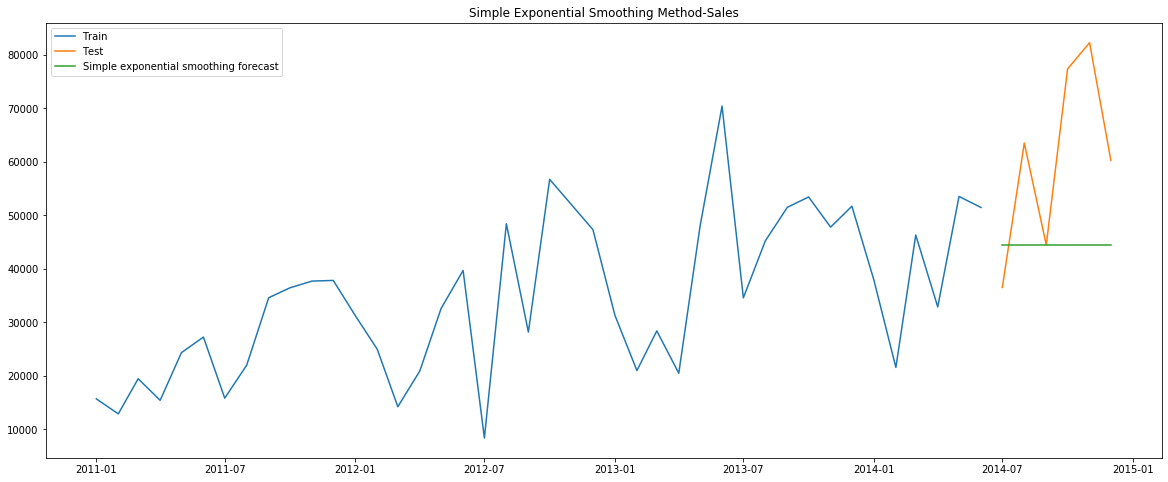

In [977]:
plt.figure(figsize=(20,8))
plt.plot(train['Total_Sales'], label='Train')
plt.plot(test['Total_Sales'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method-Sales')
plt.show()

In [978]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Total_Sales'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Total_Sales']-y_hat_ses['ses_forecast'])/test['Total_Sales'])*100,2)

results = pd.DataFrame({'Method':['Simple exponential smoothing forecast-Sales'], 'RMSE': [rmse],'MAPE': [mape] })
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast-Sales,23112.44,27.82


In [979]:
#2.Holt’s exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(np.asarray(train['Total_Sales']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.2, 'smoothing_slope': 0.01, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 15711.712500000003, 'initial_slope': -2800.8537000000033, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


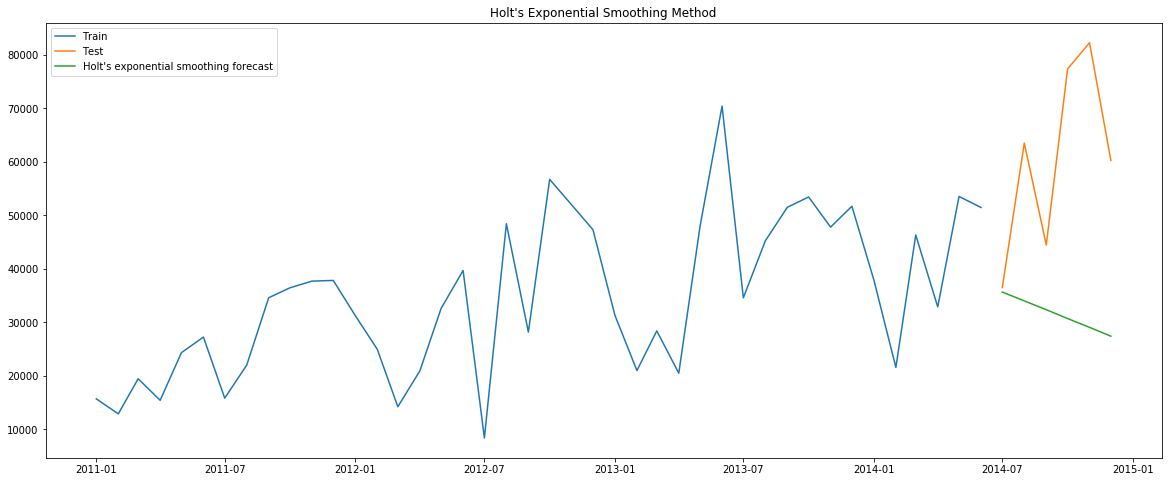

In [980]:
plt.figure(figsize=(20,8))
plt.plot( train['Total_Sales'], label='Train')
plt.plot(test['Total_Sales'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [981]:
rmse = np.sqrt(mean_squared_error(test['Total_Sales'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Total_Sales']-y_hat_holt['holt_forecast'])/test['Total_Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method - Sales'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast-Sales,23112.44,27.82
0,Holt's exponential smoothing method - Sales,34412.52,42.57


In [982]:
#3.Holt-Winters’ exponential smoothing-Additive
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Total_Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(6) #Forecast for 6 months

{'smoothing_level': 0.052631578947367676, 'smoothing_slope': 0.05263157894736842, 'smoothing_seasonal': 0.10526315789474944, 'damping_slope': nan, 'initial_level': 29061.291899999593, 'initial_slope': 730.4167145833245, 'initial_seasons': array([-13349.5794, -16150.4331,  -9588.7287, -13620.9873,  -4712.3196,
        -1801.2723, -13218.4602,  -7049.0553,   5551.893 ,   7410.7551,
         8661.312 ,   8785.6992]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


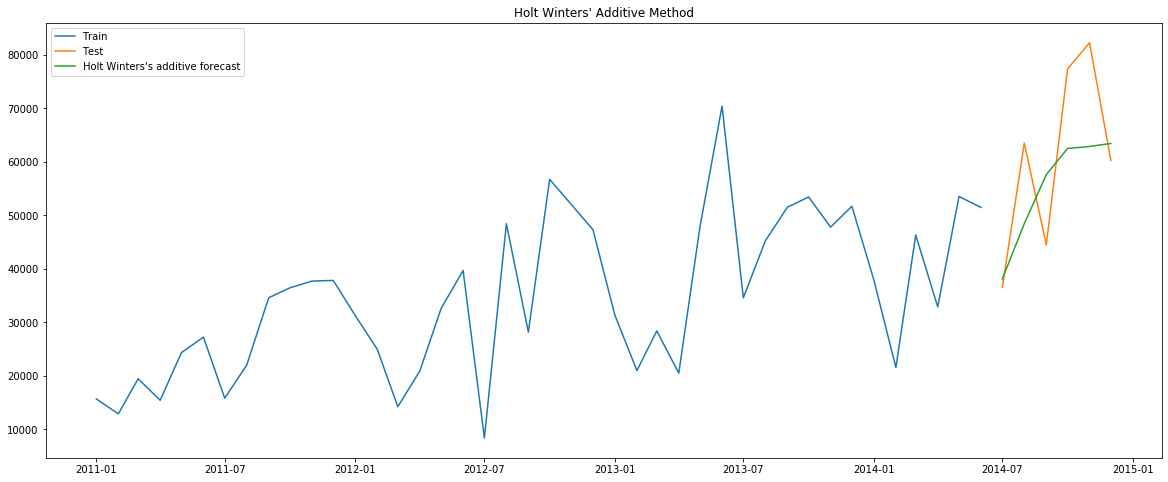

In [983]:
plt.figure(figsize=(20,8))
plt.plot( train['Total_Sales'], label='Train')
plt.plot(test['Total_Sales'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

In [984]:
rmse = np.sqrt(mean_squared_error(test['Total_Sales'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Total_Sales']-y_hat_hwa['hw_forecast'])/test['Total_Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method - Sales'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast-Sales,23112.44,27.82
0,Holt's exponential smoothing method - Sales,34412.52,42.57
0,Holt Winters' additive method - Sales,12971.01,17.61


In [985]:
#4.Holt-Winters’ exponential smoothing-Multiplicative
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Total_Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(6) #Forecast for 6 months

{'smoothing_level': 0.05263157894736842, 'smoothing_slope': 0.05263157894736842, 'smoothing_seasonal': 0.21052631578947367, 'damping_slope': nan, 'initial_level': 29061.291900000004, 'initial_slope': 730.4167145833347, 'initial_seasons': array([0.54064054, 0.44426307, 0.67005153, 0.53130138, 0.83784893,
       0.93801816, 0.54515235, 0.75744178, 1.19104082, 1.25500432,
       1.29803603, 1.3023162 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


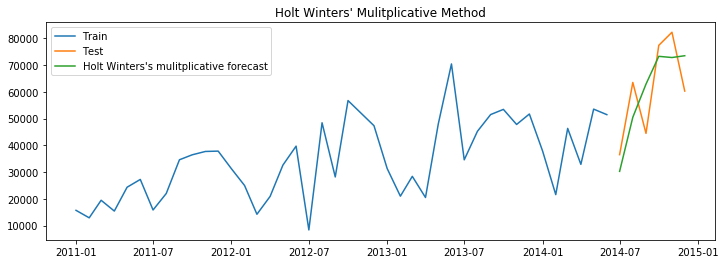

In [986]:
plt.figure(figsize=(12,4))
plt.plot( train['Total_Sales'], label='Train')
plt.plot(test['Total_Sales'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

In [987]:
rmse = np.sqrt(mean_squared_error(test['Total_Sales'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Total_Sales']-y_hat_hwm['hw_forecast'])/test['Total_Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method - Sales'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results
#From the above smoothing techniques Holt Winter's Exponential Smoothing -Additive method is the best suitable to forecast sales 
#as it's having the least MAPE(Mean Absolute Percentage Error)

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast-Sales,23112.44,27.82
0,Holt's exponential smoothing method - Sales,34412.52,42.57
0,Holt Winters' additive method - Sales,12971.01,17.61
0,Holt Winters' multiplicative method - Sales,11753.42,19.62


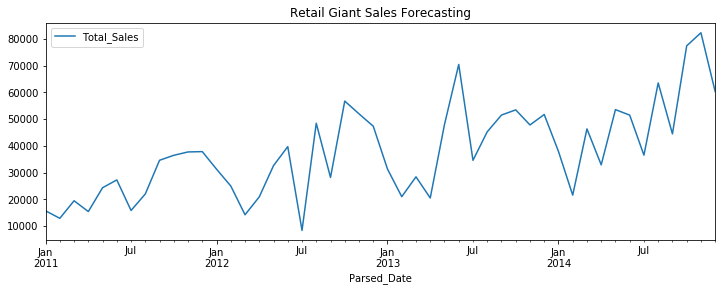

In [988]:
#Time series plot
data5['Total_Sales'].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Retail Giant Sales Forecasting')
plt.show()

In [989]:
#ADF-TEST
#H0-Series is not stationary p-Value>0.05
#H1-Series is stationary p-value<=0.05)
from statsmodels.tsa.stattools import adfuller
adf_test=adfuller(data5['Total_Sales'])

print('ADF statistic: %f' % adf_test[0])
print('Critical Value @0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF statistic: -2.220857
Critical Value @0.05: -2.93
p-value: 0.198763


In [990]:
#KPSS - TEST
#H0-Series is  stationary p-Value>0.05
#H1-Series is not stationary p-value<=0.05)
from statsmodels.tsa.stattools import kpss
kpss_test=kpss(data5['Total_Sales'])

print('KPSS statistic: %f' % kpss_test[0])
print('Critical Value @0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS statistic: 0.595515
Critical Value @0.05: 0.46
p-value: 0.023044


In [991]:
#Both ADF and KPSS states that Time Series in non stationary .So we will apply Box-Cox transformation for trend and Differencing
#thereafter for converting it to Stationary series

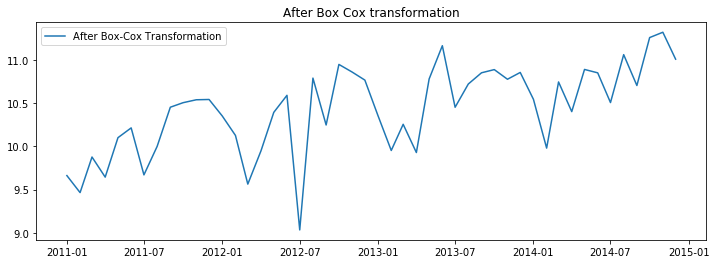

In [992]:
#Box-Cox Transformation
from scipy.stats import boxcox
data_boxcox=pd.Series(boxcox(data5['Total_Sales'],lmbda=0),index=data5.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox,label='After Box-Cox Transformation')
plt.legend(loc='best')
plt.title('After Box Cox transformation')
plt.show()

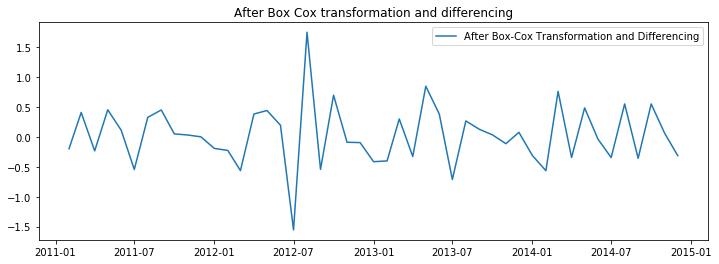

In [993]:
#Differencing
data_boxcox_diff=pd.Series(data_boxcox-data_boxcox.shift(),index=data5.index)
data_boxcox_diff.dropna(inplace=True)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff,label='After Box-Cox Transformation and Differencing')
plt.legend(loc='best')
plt.title('After Box Cox transformation and differencing')
plt.show()

In [994]:
#Again ADF-TEST
#H0-Series is not stationary p-Value>0.05
#H1-Series is stationary p-value<=0.05)
adf_test=adfuller(data_boxcox_diff)

print('ADF statistic: %f' % adf_test[0])
print('Critical Value @0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF statistic: -5.769275
Critical Value @0.05: -2.95
p-value: 0.000001


In [995]:
##Again KPSS Test
#H0-Series is  stationary p-Value>0.05
#H1-Series is not stationary p-value<=0.05)
kpss_test=kpss(data_boxcox_diff)

print('KPSS statistic: %f' % kpss_test[0])
print('Critical Value @0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS statistic: 0.135659
Critical Value @0.05: 0.46
p-value: 0.100000


In [996]:
#Both ADF and KPSS Test states that TS is now stationary

###### Auto Regressive Models

In [997]:
#Split the data in train and test datasets
train_data_boxcox=data_boxcox[:train_len]
test_data_boxcox=data_boxcox[train_len:]

train_data_boxcox_diff=data_boxcox_diff[:train_len-1]
test_data_boxcox_diff=data_boxcox_diff[train_len-1:]

In [998]:
#1.Simple Auto Regressive Model(AR)
from statsmodels.tsa.arima_model import ARIMA

model=ARIMA(train_data_boxcox_diff,order=(1,0,0))
model_fit=model.fit()
print(model_fit.params)

const      0.031320
ar.L1.y   -0.483978
dtype: float64


In [999]:
#Recover original time series forecast
y_hat_ar=data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff']=model_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox']=y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox']=y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])

y_hat_ar['ar_forecast']=np.exp(y_hat_ar['ar_forecast_boxcox'])

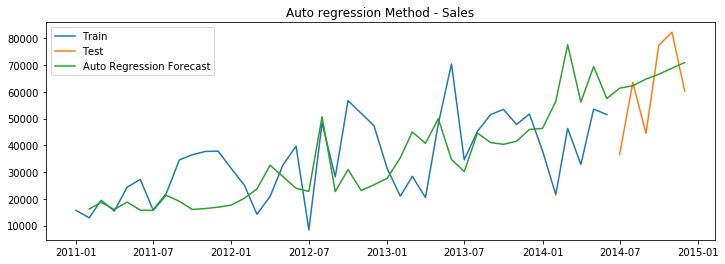

In [1000]:
#plot train,test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Total_Sales'],label='Train')
plt.plot(test['Total_Sales'],label='Test')
plt.plot(y_hat_ar['ar_forecast'],label='Auto Regression Forecast')
plt.legend(loc='best')
plt.title('Auto regression Method - Sales')
plt.show()

In [1001]:
#RMSE and MAPE
rmse=np.sqrt(mean_squared_error(test['Total_Sales'],y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape=np.round(np.mean(np.abs(test['Total_Sales'] - y_hat_ar['ar_forecast'][test.index.min():])/test['Total_Sales'])*100,2)

tempResults=pd.DataFrame({'Method':['Simple Auto Regressive(AR) Method - Sales'],'RMSE':[rmse],'MAPE':[mape]})
results=pd.concat([results,tempResults])
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast-Sales,23112.44,27.82
0,Holt's exponential smoothing method - Sales,34412.52,42.57
0,Holt Winters' additive method - Sales,12971.01,17.61
0,Holt Winters' multiplicative method - Sales,11753.42,19.62
0,Simple Auto Regressive(AR) Method - Sales,15505.02,27.27


In [1002]:
#2.Moving Average(MA)Method
model=ARIMA(train_data_boxcox_diff,order=(0,0,1))
model_fit=model.fit()
print(model_fit.params)

const      0.022694
ma.L1.y   -1.000000
dtype: float64


In [1003]:
#Recover original time series forecast
y_hat_ma=data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff']=model_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox']=y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox']=y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])

y_hat_ma['ma_forecast']=np.exp(y_hat_ma['ma_forecast_boxcox'])

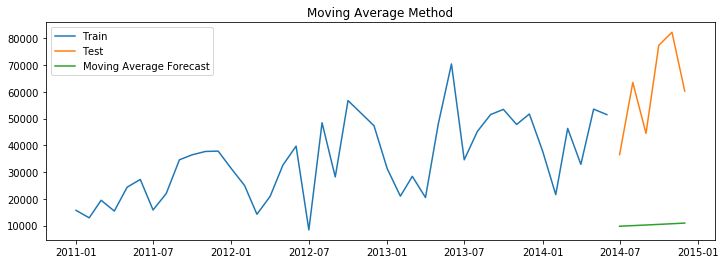

In [1004]:
#plot train,test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Total_Sales'],label='Train')
plt.plot(test['Total_Sales'],label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():],label='Moving Average Forecast') #forecast graph only for test data
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

In [1005]:
#RMSE and MAPE
rmse=np.sqrt(mean_squared_error(test['Total_Sales'],y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape=np.round(np.mean(np.abs(test['Total_Sales'] - y_hat_ma['ma_forecast'][test.index.min():])/test['Total_Sales'])*100,2)

tempResults=pd.DataFrame({'Method':['Moving Average(MA) Method - Sales'],'RMSE':[rmse],'MAPE':[mape]})
results=pd.concat([results,tempResults])
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast-Sales,23112.44,27.82
0,Holt's exponential smoothing method - Sales,34412.52,42.57
0,Holt Winters' additive method - Sales,12971.01,17.61
0,Holt Winters' multiplicative method - Sales,11753.42,19.62
0,Simple Auto Regressive(AR) Method - Sales,15505.02,27.27
0,Moving Average(MA) Method - Sales,52903.35,81.64


In [1006]:
#3.Auto Regressive Moving Average(ARMA)Method
model=ARIMA(train_data_boxcox_diff,order=(1,0,1))
model_fit=model.fit()
print(model_fit.params)

const      0.022810
ar.L1.y    0.115922
ma.L1.y   -0.999969
dtype: float64


In [1007]:
#Recover original time series forecast
y_hat_arma=data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff']=model_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox']=y_hat_arma['arma_forecast_boxcox_diff'].cumsum() #recover differencing
y_hat_arma['arma_forecast_boxcox']=y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast']=np.exp(y_hat_arma['arma_forecast_boxcox']) #recover 

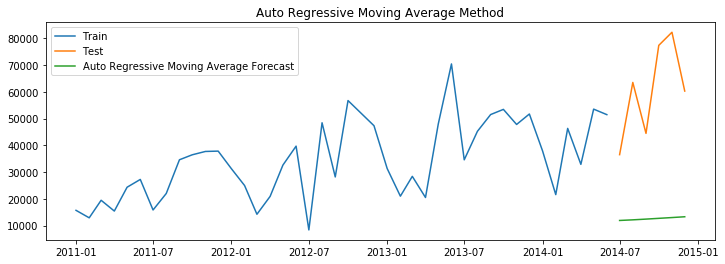

In [1008]:
#plot train,test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Total_Sales'],label='Train')
plt.plot(test['Total_Sales'],label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():],label='Auto Regressive Moving Average Forecast') #forecast graph only for test data
plt.legend(loc='best')
plt.title('Auto Regressive Moving Average Method')
plt.show()

In [1009]:
#RMSE and MAPE
rmse=np.sqrt(mean_squared_error(test['Total_Sales'],y_hat_arma['arma_forecast'][test.index.min():])).round(2)
mape=np.round(np.mean(np.abs(test['Total_Sales'] - y_hat_arma['arma_forecast'][test.index.min():])/test['Total_Sales'])*100,2)

tempResults=pd.DataFrame({'Method':['ARMA Method - Sales'],'RMSE':[rmse],'MAPE':[mape]})
results=pd.concat([results,tempResults])
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast-Sales,23112.44,27.82
0,Holt's exponential smoothing method - Sales,34412.52,42.57
0,Holt Winters' additive method - Sales,12971.01,17.61
0,Holt Winters' multiplicative method - Sales,11753.42,19.62
0,Simple Auto Regressive(AR) Method - Sales,15505.02,27.27
0,Moving Average(MA) Method - Sales,52903.35,81.64
0,ARMA Method - Sales,50757.93,77.66


In [1010]:
#4.Auto Regressive Integrated Moving Average Method(ARIMA)
model=ARIMA(train_data_boxcox,order=(1,1,1))
model_fit=model.fit()
print(model_fit.params)

const        0.022810
ar.L1.D.y    0.115922
ma.L1.D.y   -0.999969
dtype: float64


In [1011]:
#Recover original time series forecast
y_hat_arima=data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff']=model_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox']=y_hat_arima['arima_forecast_boxcox_diff'].cumsum() #recover differencing
y_hat_arima['arima_forecast_boxcox']=y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast']=np.exp(y_hat_arima['arima_forecast_boxcox']) #recover 

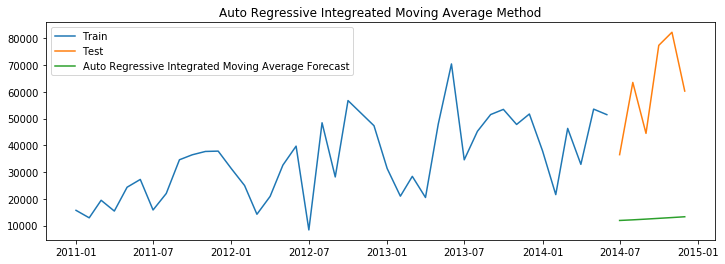

In [1012]:
#plot train,test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Total_Sales'],label='Train')
plt.plot(test['Total_Sales'],label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():],label='Auto Regressive Integrated Moving Average Forecast') #forecast graph only for test data
plt.legend(loc='best')
plt.title('Auto Regressive Integreated Moving Average Method')
plt.show()

In [1013]:
#RMSE and MAPE
rmse=np.sqrt(mean_squared_error(test['Total_Sales'],y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape=np.round(np.mean(np.abs(test['Total_Sales'] - y_hat_arima['arima_forecast'][test.index.min():])/test['Total_Sales'])*100,2)

tempResults=pd.DataFrame({'Method':['ARIMA Method -Sales'],'RMSE':[rmse],'MAPE':[mape]})
results=pd.concat([results,tempResults])
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast-Sales,23112.44,27.82
0,Holt's exponential smoothing method - Sales,34412.52,42.57
0,Holt Winters' additive method - Sales,12971.01,17.61
0,Holt Winters' multiplicative method - Sales,11753.42,19.62
0,Simple Auto Regressive(AR) Method - Sales,15505.02,27.27
0,Moving Average(MA) Method - Sales,52903.35,81.64
0,ARMA Method - Sales,50757.93,77.66
0,ARIMA Method -Sales,50757.93,77.66


In [1014]:
#5.Seasonal Auto Regressive Integrated Moving Average Method(SARIMA)
from statsmodels.tsa.statespace.sarimax import SARIMAX

model=SARIMAX(train_data_boxcox,order=(1,1,1),seasonal_order=(1,1,1,6))
model_fit=model.fit()
print(model_fit.params)

ar.L1     -0.174162
ma.L1     -0.990846
ar.S.L6   -0.540407
ma.S.L6   -0.997287
sigma2     0.083090
dtype: float64


In [1015]:
#Recover original time series forecast
y_hat_sarima=data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox']=model_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast']=np.exp(y_hat_sarima['sarima_forecast_boxcox'])

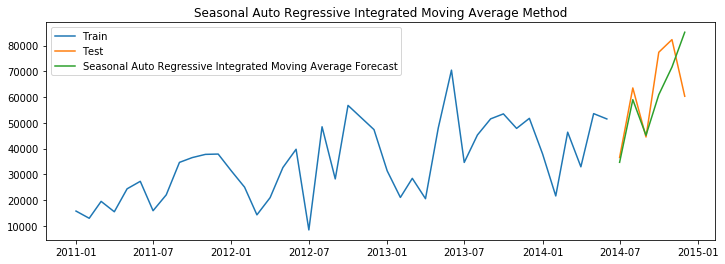

In [1016]:
#plot train,test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Total_Sales'],label='Train')
plt.plot(test['Total_Sales'],label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():],label='Seasonal Auto Regressive Integrated Moving Average Forecast')
plt.legend(loc='best')
plt.title('Seasonal Auto Regressive Integrated Moving Average Method')
plt.show()

In [1017]:
#RMSE and MAPE
rmse=np.sqrt(mean_squared_error(test['Total_Sales'],y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape=np.round(np.mean(np.abs(test['Total_Sales'] - y_hat_sarima['sarima_forecast'][test.index.min():])/test['Total_Sales'])*100,2)

tempResults=pd.DataFrame({'Method':['SARIMA-Sales'],'RMSE':[rmse],'MAPE':[mape]})
results=pd.concat([results,tempResults])
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast-Sales,23112.44,27.82
0,Holt's exponential smoothing method - Sales,34412.52,42.57
0,Holt Winters' additive method - Sales,12971.01,17.61
0,Holt Winters' multiplicative method - Sales,11753.42,19.62
0,Simple Auto Regressive(AR) Method - Sales,15505.02,27.27
0,Moving Average(MA) Method - Sales,52903.35,81.64
0,ARMA Method - Sales,50757.93,77.66
0,ARIMA Method -Sales,50757.93,77.66
0,SARIMA-Sales,13092.85,14.89


In [1018]:
#Amongst the Auto Regressive models SARIMA is best suited for Sales forecast as it has lowest MAPE among all Auto Regressive models

## FORECAST QUANTITY for Next 6 Months

###### SMOOTHING Techniques

In [1019]:
#1.Simple exponential smoothing

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(train['Total_Qty'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(6) #6 months forecast

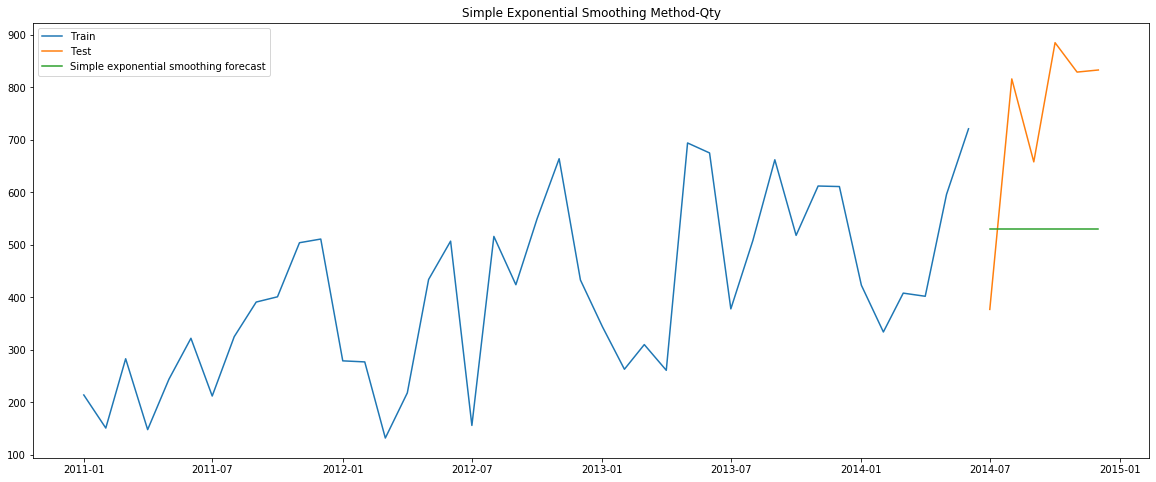

In [1020]:
plt.figure(figsize=(20,8))
plt.plot(train['Total_Qty'], label='Train')
plt.plot(test['Total_Qty'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method-Qty')
plt.show()

In [1021]:
#RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Total_Qty'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Total_Qty']-y_hat_ses['ses_forecast'])/test['Total_Qty'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast-QTY'], 'RMSE': [rmse],'MAPE': [mape] })
results=pd.concat([results,tempResults])
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast-Sales,23112.44,27.82
0,Holt's exponential smoothing method - Sales,34412.52,42.57
0,Holt Winters' additive method - Sales,12971.01,17.61
0,Holt Winters' multiplicative method - Sales,11753.42,19.62
0,Simple Auto Regressive(AR) Method - Sales,15505.02,27.27
0,Moving Average(MA) Method - Sales,52903.35,81.64
0,ARMA Method - Sales,50757.93,77.66
0,ARIMA Method -Sales,50757.93,77.66
0,SARIMA-Sales,13092.85,14.89
0,Simple exponential smoothing forecast-QTY,266.82,34.57


In [1022]:
#2.Holt’s exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(np.asarray(train['Total_Qty']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.2, 'smoothing_slope': 0.01, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 214.0, 'initial_slope': -63.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


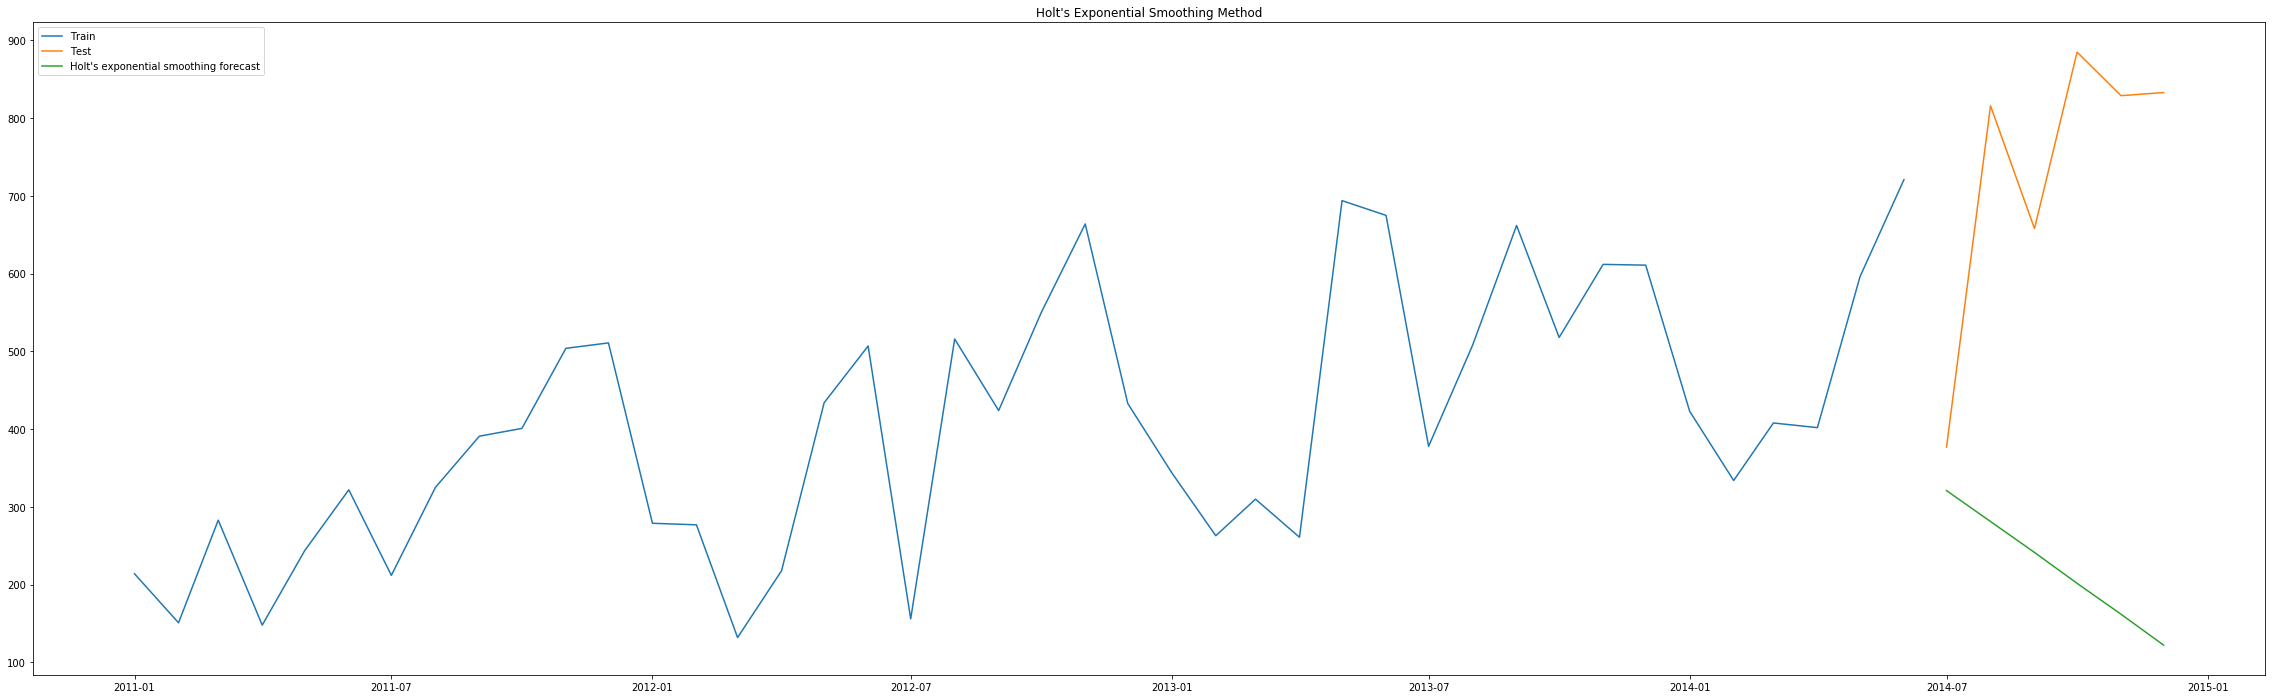

In [1023]:

plt.figure(figsize=(40,12))
plt.plot( train['Total_Qty'], label='Train')
plt.plot(test['Total_Qty'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [1024]:
#RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Total_Qty'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Total_Qty']-y_hat_holt['holt_forecast'])/test['Total_Qty'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method - QTY'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast-Sales,23112.44,27.82
0,Holt's exponential smoothing method - Sales,34412.52,42.57
0,Holt Winters' additive method - Sales,12971.01,17.61
0,Holt Winters' multiplicative method - Sales,11753.42,19.62
0,Simple Auto Regressive(AR) Method - Sales,15505.02,27.27
0,Moving Average(MA) Method - Sales,52903.35,81.64
0,ARMA Method - Sales,50757.93,77.66
0,ARIMA Method -Sales,50757.93,77.66
0,SARIMA-Sales,13092.85,14.89
0,Simple exponential smoothing forecast-QTY,266.82,34.57


In [1025]:
#3.Holt-Winters’ exponential smoothing-Additive
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Total_Qty']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(6) #Forecast for 6 months

{'smoothing_level': 0.05263157894736842, 'smoothing_slope': 0.05263157894736842, 'smoothing_seasonal': 0.47368421052631576, 'damping_slope': nan, 'initial_level': 315.0, 'initial_slope': 6.138888888888889, 'initial_seasons': array([-101., -164.,  -32., -167.,  -71.,    7., -103.,   10.,   76.,
         86.,  189.,  196.]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


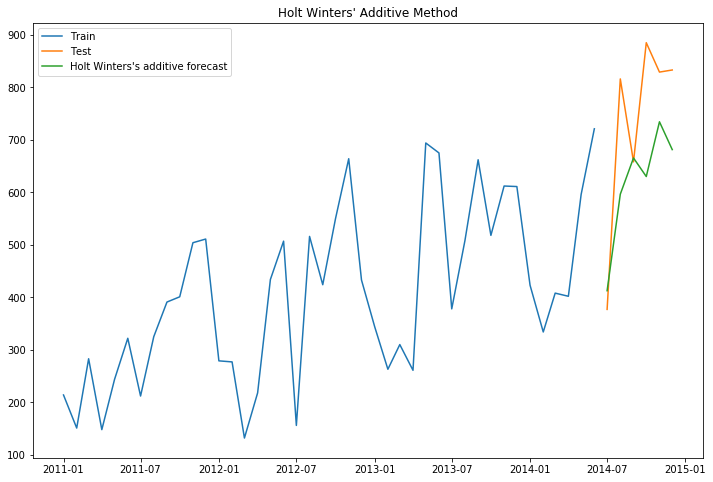

In [1026]:
plt.figure(figsize=(12,8))
plt.plot( train['Total_Qty'], label='Train')
plt.plot(test['Total_Qty'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

In [1027]:
rmse = np.sqrt(mean_squared_error(test['Total_Qty'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Total_Qty']-y_hat_hwa['hw_forecast'])/test['Total_Qty'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method - QTY'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast-Sales,23112.44,27.82
0,Holt's exponential smoothing method - Sales,34412.52,42.57
0,Holt Winters' additive method - Sales,12971.01,17.61
0,Holt Winters' multiplicative method - Sales,11753.42,19.62
0,Simple Auto Regressive(AR) Method - Sales,15505.02,27.27
0,Moving Average(MA) Method - Sales,52903.35,81.64
0,ARMA Method - Sales,50757.93,77.66
0,ARIMA Method -Sales,50757.93,77.66
0,SARIMA-Sales,13092.85,14.89
0,Simple exponential smoothing forecast-QTY,266.82,34.57


In [1028]:
#4.Holt-Winters’ exponential smoothing-Multiplicative
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Total_Qty']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(6) #Forecast for 6 months

{'smoothing_level': 0.05263157894736842, 'smoothing_slope': 0.05263157894736842, 'smoothing_seasonal': 0.47368421052631576, 'damping_slope': nan, 'initial_level': 315.0, 'initial_slope': 6.138888888888889, 'initial_seasons': array([0.67936508, 0.47936508, 0.8984127 , 0.46984127, 0.77460317,
       1.02222222, 0.67301587, 1.03174603, 1.24126984, 1.27301587,
       1.6       , 1.62222222]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


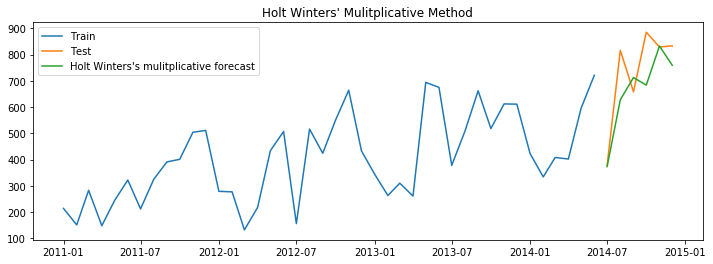

In [1029]:
plt.figure(figsize=(12,4))
plt.plot( train['Total_Qty'], label='Train')
plt.plot(test['Total_Qty'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

In [1030]:
rmse = np.sqrt(mean_squared_error(test['Total_Qty'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Total_Qty']-y_hat_hwm['hw_forecast'])/test['Total_Qty'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method - QTY'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast-Sales,23112.44,27.82
0,Holt's exponential smoothing method - Sales,34412.52,42.57
0,Holt Winters' additive method - Sales,12971.01,17.61
0,Holt Winters' multiplicative method - Sales,11753.42,19.62
0,Simple Auto Regressive(AR) Method - Sales,15505.02,27.27
0,Moving Average(MA) Method - Sales,52903.35,81.64
0,ARMA Method - Sales,50757.93,77.66
0,ARIMA Method -Sales,50757.93,77.66
0,SARIMA-Sales,13092.85,14.89
0,Simple exponential smoothing forecast-QTY,266.82,34.57


In [1031]:
#From the above smoothing techniques Holt Winter's Exponential Smoothing -Multiplicative method is the best suitable to forecast sales 
#as it's having the least MAPE(Mean Absolute Percentage Error)

###### Auto Regressive Models

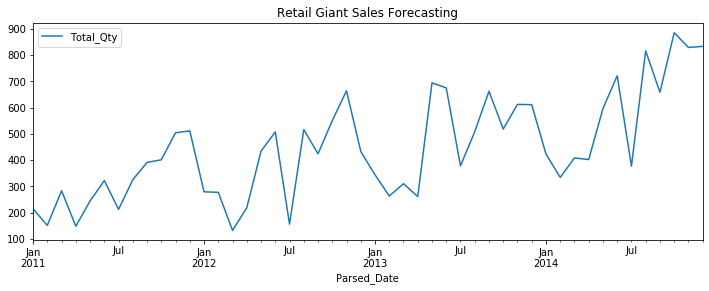

In [1032]:
#Time series plot
data5['Total_Qty'].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Retail Giant Sales Forecasting')
plt.show()

In [1033]:
#ADF-TEST
#H0-Series is not stationary p-Value>0.05
#H1-Series is stationary p-value<=0.05)
from statsmodels.tsa.stattools import adfuller
adf_test=adfuller(data5['Total_Qty'])

print('ADF statistic: %f' % adf_test[0])
print('Critical Value @0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF statistic: 0.293145
Critical Value @0.05: -2.94
p-value: 0.977028


In [1034]:
#KPSS - TEST
#H0-Series is  stationary p-Value>0.05
#H1-Series is not stationary p-value<=0.05)
from statsmodels.tsa.stattools import kpss
kpss_test=kpss(data5['Total_Qty'])
print('KPSS statistic: %f' % kpss_test[0])
print('Critical Value @0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS statistic: 0.593099
Critical Value @0.05: 0.46
p-value: 0.023264


In [1035]:
#Both ADF and KPSS states that Time Series in non stationary .So we will apply Box-Cox transformation for trend and Differencing
#thereafter for converting it to Stationary series

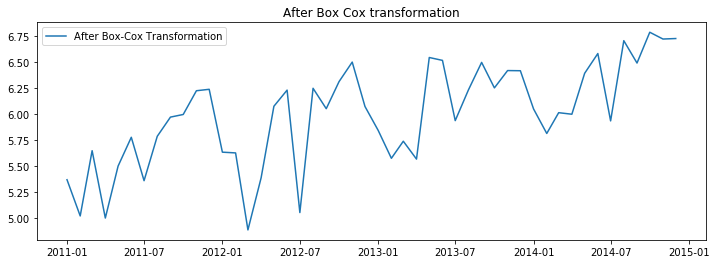

In [1036]:
#Box-Cox Transformation
from scipy.stats import boxcox
data_boxcox=pd.Series(boxcox(data5['Total_Qty'],lmbda=0),index=data5.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox,label='After Box-Cox Transformation')
plt.legend(loc='best')
plt.title('After Box Cox transformation')
plt.show()

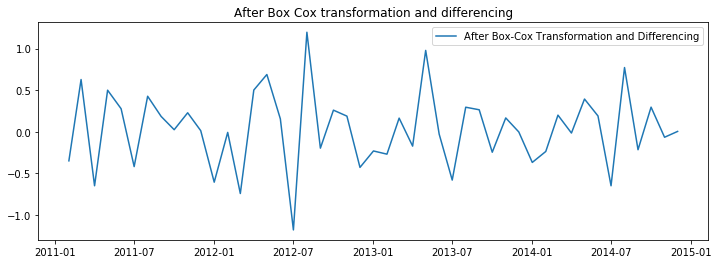

In [1037]:
#Differencing
data_boxcox_diff=pd.Series(data_boxcox-data_boxcox.shift(),index=data5.index)
data_boxcox_diff.dropna(inplace=True)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff,label='After Box-Cox Transformation and Differencing')
plt.legend(loc='best')
plt.title('After Box Cox transformation and differencing')
plt.show()

In [1038]:
#Again ADF-TEST
#H0-Series is not stationary p-Value>0.05
#H1-Series is stationary p-value<=0.05)
adf_test=adfuller(data_boxcox_diff)

print('ADF statistic: %f' % adf_test[0])
print('Critical Value @0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF statistic: -6.731694
Critical Value @0.05: -2.95
p-value: 0.000000


In [1039]:
##Again KPSS Test
#H0-Series is  stationary p-Value>0.05
#H1-Series is not stationary p-value<=0.05)
kpss_test=kpss(data_boxcox_diff)

print('KPSS statistic: %f' % kpss_test[0])
print('Critical Value @0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS statistic: 0.157717
Critical Value @0.05: 0.46
p-value: 0.100000


In [1040]:
#Both ADF and KPSS Test states that TS is now stationary

In [1041]:
#Split the data in train and test datasets
train_data_boxcox=data_boxcox[:train_len]
test_data_boxcox=data_boxcox[train_len:]

train_data_boxcox_diff=data_boxcox_diff[:train_len-1]
test_data_boxcox_diff=data_boxcox_diff[train_len-1:]

In [1042]:
#1.Simple Auto Regressive Model(AR)
model=ARIMA(train_data_boxcox_diff,order=(1,0,0))
model_fit=model.fit()
print(model_fit.params)

const      0.031031
ar.L1.y   -0.354124
dtype: float64


In [1043]:
#Recover original time series forecast
y_hat_ar=data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff']=model_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox']=y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox']=y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])

y_hat_ar['ar_forecast']=np.exp(y_hat_ar['ar_forecast_boxcox'])

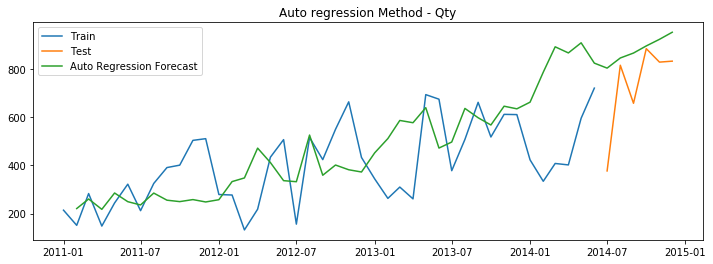

In [1044]:
#plot train,test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Total_Qty'],label='Train')
plt.plot(test['Total_Qty'],label='Test')
plt.plot(y_hat_ar['ar_forecast'],label='Auto Regression Forecast')
plt.legend(loc='best')
plt.title('Auto regression Method - Qty')
plt.show()

In [1045]:
#RMSE and MAPE
rmse=np.sqrt(mean_squared_error(test['Total_Qty'],y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape=np.round(np.mean(np.abs(test['Total_Qty'] - y_hat_ar['ar_forecast'][test.index.min():])/test['Total_Qty'])*100,2)

tempResults=pd.DataFrame({'Method':['Simple Auto Regressive(AR) Method - QTY'],'RMSE':[rmse],'MAPE':[mape]})
results=pd.concat([results,tempResults])
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast-Sales,23112.44,27.82
0,Holt's exponential smoothing method - Sales,34412.52,42.57
0,Holt Winters' additive method - Sales,12971.01,17.61
0,Holt Winters' multiplicative method - Sales,11753.42,19.62
0,Simple Auto Regressive(AR) Method - Sales,15505.02,27.27
0,Moving Average(MA) Method - Sales,52903.35,81.64
0,ARMA Method - Sales,50757.93,77.66
0,ARIMA Method -Sales,50757.93,77.66
0,SARIMA-Sales,13092.85,14.89
0,Simple exponential smoothing forecast-QTY,266.82,34.57


In [1046]:
#2.Moving Average(MA)Method
model=ARIMA(train_data_boxcox_diff,order=(0,0,1))
model_fit=model.fit()
print(model_fit.params)

const      0.022029
ma.L1.y   -1.000000
dtype: float64


In [1047]:
#Recover original time series forecast
y_hat_ma=data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff']=model_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox']=y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox']=y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])

y_hat_ma['ma_forecast']=np.exp(y_hat_ma['ma_forecast_boxcox'])

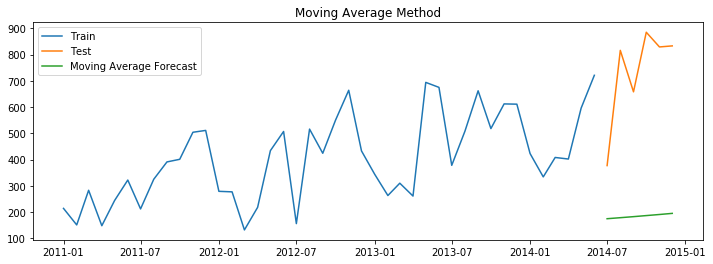

In [1048]:

#plot train,test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Total_Qty'],label='Train')
plt.plot(test['Total_Qty'],label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():],label='Moving Average Forecast') #forecast graph only for test data
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

In [1049]:
#RMSE and MAPE
rmse=np.sqrt(mean_squared_error(test['Total_Qty'],y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape=np.round(np.mean(np.abs(test['Total_Qty'] - y_hat_ma['ma_forecast'][test.index.min():])/test['Total_Qty'])*100,2)

tempResults=pd.DataFrame({'Method':['Moving Average(MA) Method - QTY'],'RMSE':[rmse],'MAPE':[mape]})
results=pd.concat([results,tempResults])
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast-Sales,23112.44,27.82
0,Holt's exponential smoothing method - Sales,34412.52,42.57
0,Holt Winters' additive method - Sales,12971.01,17.61
0,Holt Winters' multiplicative method - Sales,11753.42,19.62
0,Simple Auto Regressive(AR) Method - Sales,15505.02,27.27
0,Moving Average(MA) Method - Sales,52903.35,81.64
0,ARMA Method - Sales,50757.93,77.66
0,ARIMA Method -Sales,50757.93,77.66
0,SARIMA-Sales,13092.85,14.89
0,Simple exponential smoothing forecast-QTY,266.82,34.57


In [1050]:
#3.Auto Regressive Moving Average(ARMA)Method
model=ARIMA(train_data_boxcox_diff,order=(1,0,1))
model_fit=model.fit()
print(model_fit.params)

const      0.022378
ar.L1.y    0.249096
ma.L1.y   -0.999998
dtype: float64


In [1051]:
#Recover original time series forecast
y_hat_arma=data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff']=model_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox']=y_hat_arma['arma_forecast_boxcox_diff'].cumsum() #recover differencing
y_hat_arma['arma_forecast_boxcox']=y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast']=np.exp(y_hat_arma['arma_forecast_boxcox']) #recover 

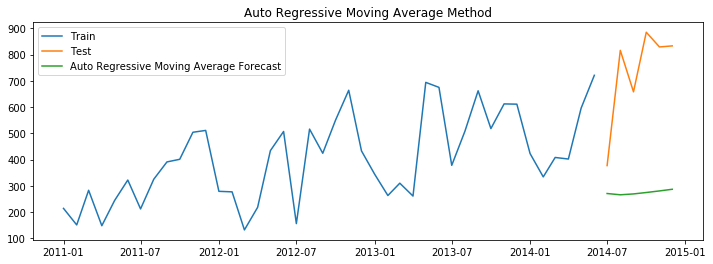

In [1052]:
#plot train,test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Total_Qty'],label='Train')
plt.plot(test['Total_Qty'],label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():],label='Auto Regressive Moving Average Forecast') #forecast graph only for test data
plt.legend(loc='best')
plt.title('Auto Regressive Moving Average Method')
plt.show()

In [1053]:
#RMSE and MAPE
rmse=np.sqrt(mean_squared_error(test['Total_Qty'],y_hat_arma['arma_forecast'][test.index.min():])).round(2)
mape=np.round(np.mean(np.abs(test['Total_Qty'] - y_hat_arma['arma_forecast'][test.index.min():])/test['Total_Qty'])*100,2)

tempResults=pd.DataFrame({'Method':['ARMA Method - QTY'],'RMSE':[rmse],'MAPE':[mape]})
results=pd.concat([results,tempResults])
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast-Sales,23112.44,27.82
0,Holt's exponential smoothing method - Sales,34412.52,42.57
0,Holt Winters' additive method - Sales,12971.01,17.61
0,Holt Winters' multiplicative method - Sales,11753.42,19.62
0,Simple Auto Regressive(AR) Method - Sales,15505.02,27.27
0,Moving Average(MA) Method - Sales,52903.35,81.64
0,ARMA Method - Sales,50757.93,77.66
0,ARIMA Method -Sales,50757.93,77.66
0,SARIMA-Sales,13092.85,14.89
0,Simple exponential smoothing forecast-QTY,266.82,34.57


In [1054]:
#4.Auto Regressive Integrated Moving Average Method(ARIMA)
model=ARIMA(train_data_boxcox,order=(1,1,1))
model_fit=model.fit()
print(model_fit.params)

const        0.022378
ar.L1.D.y    0.249096
ma.L1.D.y   -0.999998
dtype: float64


In [1055]:

#Recover original time series forecast
y_hat_arima=data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff']=model_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox']=y_hat_arima['arima_forecast_boxcox_diff'].cumsum() #recover differencing
y_hat_arima['arima_forecast_boxcox']=y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast']=np.exp(y_hat_arima['arima_forecast_boxcox']) #recover

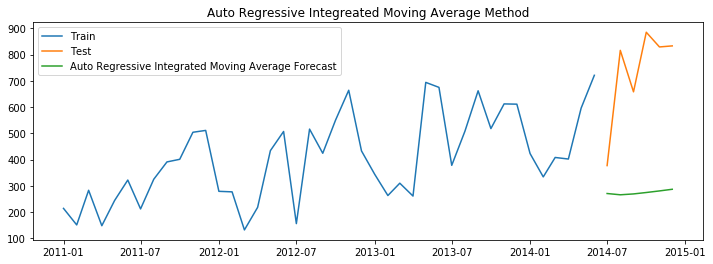

In [1056]:
#plot train,test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Total_Qty'],label='Train')
plt.plot(test['Total_Qty'],label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():],label='Auto Regressive Integrated Moving Average Forecast') #forecast graph only for test data
plt.legend(loc='best')
plt.title('Auto Regressive Integreated Moving Average Method')
plt.show()

In [1057]:
#RMSE and MAPE
rmse=np.sqrt(mean_squared_error(test['Total_Qty'],y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape=np.round(np.mean(np.abs(test['Total_Qty'] - y_hat_arima['arima_forecast'][test.index.min():])/test['Total_Qty'])*100,2)

tempResults=pd.DataFrame({'Method':['ARIMA Method -QTY'],'RMSE':[rmse],'MAPE':[mape]})
results=pd.concat([results,tempResults])
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast-Sales,23112.44,27.82
0,Holt's exponential smoothing method - Sales,34412.52,42.57
0,Holt Winters' additive method - Sales,12971.01,17.61
0,Holt Winters' multiplicative method - Sales,11753.42,19.62
0,Simple Auto Regressive(AR) Method - Sales,15505.02,27.27
0,Moving Average(MA) Method - Sales,52903.35,81.64
0,ARMA Method - Sales,50757.93,77.66
0,ARIMA Method -Sales,50757.93,77.66
0,SARIMA-Sales,13092.85,14.89
0,Simple exponential smoothing forecast-QTY,266.82,34.57


In [1058]:
#5.Seasonal Auto Regressive Integrated Moving Average Method(SARIMA)

model=SARIMAX(train_data_boxcox,order=(1,1,1),seasonal_order=(1,1,1,6))
model_fit=model.fit()
print(model_fit.params)

ar.L1     -0.182393
ma.L1     -0.994653
ar.S.L6   -0.650803
ma.S.L6   -0.988548
sigma2     0.059127
dtype: float64


In [1059]:
#Recover original time series forecast
y_hat_sarima=data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox']=model_fit.predict(data_boxcox_diff.index.min(),data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast']=np.exp(y_hat_sarima['sarima_forecast_boxcox'])

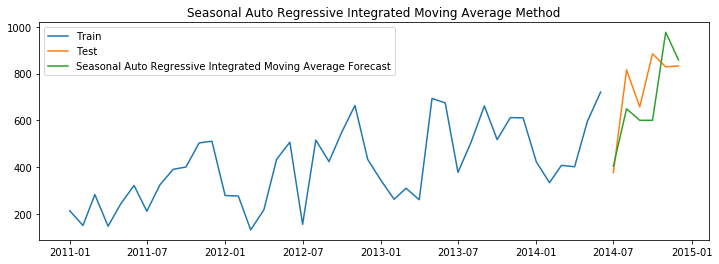

In [1060]:
#plot train,test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Total_Qty'],label='Train')
plt.plot(test['Total_Qty'],label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():],label='Seasonal Auto Regressive Integrated Moving Average Forecast')
plt.legend(loc='best')
plt.title('Seasonal Auto Regressive Integrated Moving Average Method')
plt.show()

In [1061]:
#RMSE and MAPE
rmse=np.sqrt(mean_squared_error(test['Total_Qty'],y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape=np.round(np.mean(np.abs(test['Total_Qty'] - y_hat_sarima['sarima_forecast'][test.index.min():])/test['Total_Qty'])*100,2)

tempResults=pd.DataFrame({'Method':['SARIMA-QTY'],'RMSE':[rmse],'MAPE':[mape]})
results=pd.concat([results,tempResults])
results

,Method,RMSE,MAPE
0,Simple exponential smoothing forecast-Sales,23112.44,27.82
0,Holt's exponential smoothing method - Sales,34412.52,42.57
0,Holt Winters' additive method - Sales,12971.01,17.61
0,Holt Winters' multiplicative method - Sales,11753.42,19.62
0,Simple Auto Regressive(AR) Method - Sales,15505.02,27.27
0,Moving Average(MA) Method - Sales,52903.35,81.64
0,ARMA Method - Sales,50757.93,77.66
0,ARIMA Method -Sales,50757.93,77.66
0,SARIMA-Sales,13092.85,14.89
0,Simple exponential smoothing forecast-QTY,266.82,34.57


In [1062]:
#Amongst the Auto Regressive models SARIMA is best suited for Qty Forecast as it has the lowest MAPE value.
#Amngst the Smoothing techniques Holt Winters' multiplicative method  is best suited for Qty forecast as it has lowest MAPE value